In [1]:
# Importing Important Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# suppressing the warnings 
import warnings
warnings.filterwarnings("ignore")

## Step 1: Understanding the Data 

In [3]:
# Reading The Data Set which is a csv file called leads
Leads = pd.read_csv("Leads.csv")
Leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Displaying the shape of the Leads Data set
Leads.shape

(9240, 37)

In [5]:
# Checking out the 37 columns of Leads
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Getting a statistical summary of the Data Set Leads
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As we can see, The Columns: "TotalVisits", "Page Views Per Visit", "Asymmetrique Activity Score" and "Asymmetrique Profile Score" have Missing Values and we need to fix this issue as we proceed.

In [7]:
# Getting Info about the Data Set Leads
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

  Our observation tells us that there are 30 Categorical Variables for which we have to create Dummy Variables and 7 Numerical Variables out of which, 3 variables are integers and 4 variables are floats. 
  Along with that, we have some Missing values in some of the variables that we later need to deal with.

## Step 2: Data Cleaning and Preparation

In [8]:
# Displaying the number of Missing values in each column of the Data Set Leads in descending Order
Leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

Here, we observe that there are a lot of columns having a high number of missing values. Since, there are 9240 data points in our dataframe, let's remove columns which have more than 3080 missing values as they are not useful to us.

In [9]:
# Dropping the columns in which there are more than 3080 missing values. 
for col in Leads.columns:
    if (Leads[col].isna().sum()>=3080):
        Leads.drop(col,axis=1,inplace=True)
        

In [10]:
# Checking the Null values again after removing some missing values in descending order
Leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

If we think analytically, the we realize that the Columns "Country" and "City" that have quite a lot of Missing Values will not be useful for the analysis of the Converted Leads since these do not serve as important factors for determining the Converted Leads.

In [11]:
# Removing the Column "Country"
Leads.drop("Country",axis=1,inplace=True)

In [12]:
pd.set_option('display.max_columns',100)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [13]:
# Removing the Column "City"
Leads.drop("City",axis=1,inplace=True)

In [14]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified


In [15]:
# Now Checking the percentage of missing values in each column
round(100*(Leads.isnull().sum())/len(Leads.index),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [16]:
# Check the number of null values again
Leads.isna().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

Now, we know that there are few columns that have the level called 'select' which is equivalent to a null value and hence is of no use to us at this point. So we deal with them by removing these values.

In [17]:
# Displaying the value counts of all the columns
for col in Leads.columns:
    print(Leads[col].astype('category').value_counts())
    print('_'*50)

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
__________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
__________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
____________________

#### The Following 3 Columns have quite a lot of 'select' values. Let's analyse them now.

In [18]:
# Displaying the value_counts on "How did you hear about X Education"
Leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
# Displaying the value_counts on "Lead Profile"
Leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
# Displaying the value_counts on "Specialization"
Leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As we can observe, The Columns: 'How did you hear about X Education' and 'Lead Profile' have the most of the values as 'Select'. Thus, we need to drop these two columns Now.

In [21]:
# Dropping The Columns: 'How did you hear about X Education' and 'Lead Profile' Now
Leads.drop(['How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [22]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


The columns: `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque` have certain values like 'No' that overshadow the other values and thereby, can cause a class imbalance which ends up giving biased results. Thus, we have to remove all the above mentioned Columns.

In [23]:
# Dropping all these Columns Now
Leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)


In [24]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [25]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [26]:
# Dropping this column 'What matters most to you in choosing a course' Now
Leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [27]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [28]:
# Checking the Null Values again
Leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
# Removing the Null Rows from the column 'What is your current occupation' Now
Leads = Leads[~pd.isnull(Leads['What is your current occupation'])]

In [30]:
# Number of Null Values Now
Leads.isna().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [31]:
# Dropping the Null Rows from 'TotalVisits'
Leads = Leads[~pd.isnull(Leads['TotalVisits'])]

In [32]:
# Number of Null Values yet Again
Leads.isna().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
# Dropping the Number of Null Rows from 'Lead Source'
Leads = Leads[~pd.isnull(Leads['Lead Source'])]

In [34]:
# Number of Null Values after removing Null Values from 'Lead Source'
Leads.isna().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [35]:
# Dropping the Number of Null Rows from 'Specialization'
Leads = Leads[~pd.isnull(Leads['Specialization'])]

In [36]:

# Number of Null Values after removing Null Values from 'Specialization'
Leads.isna().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Data is Clean and Free From Null Values Now

In [37]:
# Checking the Percentage of Rows That have been Retained
print((len(Leads.index)/9240)*100)

68.97186147186147


So, we are still left with almost 69 Percent of the rows which is good enough for our analysis.

In [38]:
# Our Data Set Again
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


So far, we have realized that the Columns: 'Prospect ID' and 'Lead Number' are of no Use to us at this point. It's time we drop them.

In [39]:
# Dropping the Columns: 'Prospect ID' and 'Lead Number' Now
Leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [40]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Step 3: Creating Dummy Variables For Categorical Variables

In [41]:
# Checking the Columns having 'object' as their data type
tempo = Leads.loc[:,Leads.dtypes=='object']
tempo.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [43]:
# Creating dummy variable separately for the variable 'Specialization' 
# since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_select = pd.get_dummies(Leads['Specialization'], prefix = 'Specialization')
dummy_select = dummy_select.drop(['Specialization_Select'], 1)
Leads = pd.concat([Leads, dummy_select], axis = 1)

In [44]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Drop the variables for which the dummy variables have been created

Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [46]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Outliers Treatment

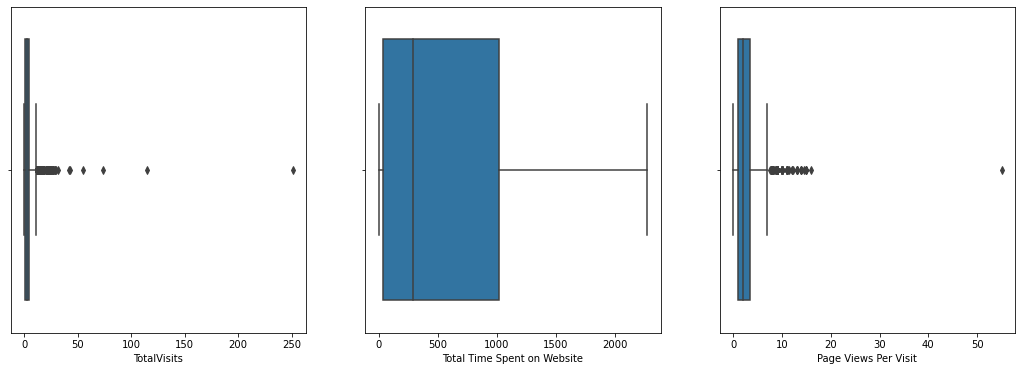

In [47]:
# Checking outliers for three Numeric Columns
plt.figure(figsize=(18,6))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=Leads)

We observe that there are few Outliers for 'TotalVisits' and 'Page Views Per Visit'. But, there are no outliers for 'Total Time Spent on Website'. So, we remove these Outliers.

In [48]:
# Finding outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_outlier: 
    q1 = Leads[col].quantile(0.10)
    q3 = Leads[col].quantile(0.90)
    iqr = q3-q1
    low_range  = q1-1.5*iqr
    high_range = q3+1.5*iqr
    Leads = Leads.loc[(Leads[col] > low_range) & (Leads[col] < high_range)]

Leads.shape

(6313, 75)

### Average Total Time Spent on Website of the converted and not converted customers

In [49]:
# Converted time spent on website in hours
Leads_converted_avg_time_spent = Leads[Leads['Converted']==1]
Converted_time_spent = round((sum(Leads_converted_avg_time_spent['Total Time Spent on Website'])/len(Leads_converted_avg_time_spent.index))/60)
print("Converted_time_spent-",Converted_time_spent)

# Not Converted time spent on website in hours
Leads_not_converted_avg_time_spent = Leads[Leads['Converted']==0]
Not_Converted_time_spent = round((sum(Leads_not_converted_avg_time_spent['Total Time Spent on Website'])/len(Leads_not_converted_avg_time_spent.index))/60)
print("Not_Converted_time_spent-",Not_Converted_time_spent)

Converted_time_spent- 12
Not_Converted_time_spent- 6


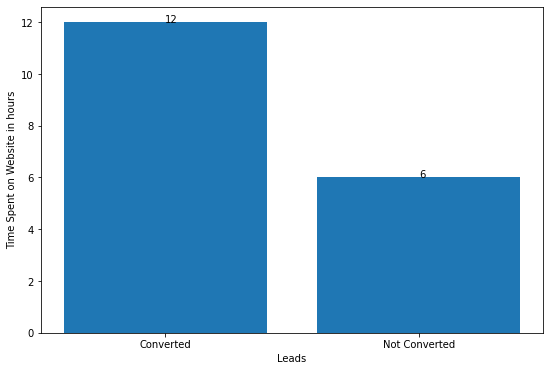

In [50]:
# Plotting The Bar Chart for Leads
plt.figure(figsize=(9,6))
plt.bar(['Converted', 'Not Converted'], [Converted_time_spent, Not_Converted_time_spent])
plt.annotate(Converted_time_spent, xy=('Converted',Converted_time_spent))
plt.annotate(Not_Converted_time_spent, xy=('Not Converted',Not_Converted_time_spent))
plt.xlabel('Leads')
plt.ylabel('Time Spent on Website in hours')
plt.show()

### Average TotalVisits of the converted and not converted customers

In [51]:
# Converted TotalVisits
Leads_converted_TotalVisits = Leads[Leads['Converted']==1]
Converted_TotalVisits = round(sum(Leads_converted_TotalVisits['TotalVisits'])/len(Leads_converted_TotalVisits.index),2)
print("Converted_TotalVisits-",Converted_TotalVisits)

# Not Converted TotalVisits
Leads_not_converted_TotalVisits = Leads[Leads['Converted']==0]
Not_Converted_TotalVisits = round(sum(Leads_not_converted_TotalVisits['TotalVisits'])/len(Leads_not_converted_TotalVisits.index),2)
print("Not_Converted_TotalVisits-",Not_Converted_TotalVisits)

Converted_TotalVisits- 3.43
Not_Converted_TotalVisits- 3.34


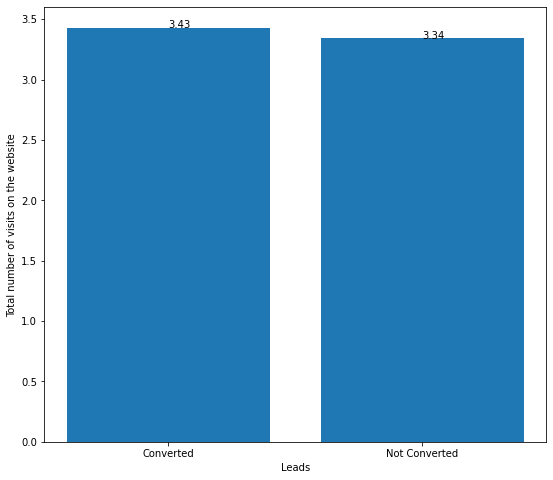

In [52]:
# Plotting The Bar Chart for TotalVisits
plt.figure(figsize=(9,8))
plt.bar(['Converted', 'Not Converted'], [Converted_TotalVisits, Not_Converted_TotalVisits])
plt.annotate(Converted_TotalVisits, xy=('Converted',Converted_TotalVisits))
plt.annotate(Not_Converted_TotalVisits, xy=('Not Converted',Not_Converted_TotalVisits))
plt.xlabel('Leads')
plt.ylabel('Total number of visits on the website')
plt.show()

### Average Page Views Per Visit of the converted and not converted customers

In [53]:
# Converted Page Views Per Visit
Leads_converted_page_views = Leads[Leads['Converted']==1]
Converted_page_views = round(sum(Leads_converted_page_views['Page Views Per Visit'])/len(Leads_converted_page_views.index),2)
print("Converted_page_views-",Converted_page_views)

# Not Converted Page Views Per Visit
Leads_not_converted_page_views = Leads[Leads['Converted']==0]
Not_Converted_page_views = round(sum(Leads_not_converted_page_views['Page Views Per Visit'])/len(Leads_not_converted_page_views.index),2)
print("Not_Converted_page_views-",Not_Converted_page_views)

Converted_page_views- 2.31
Not_Converted_page_views- 2.54


In [54]:
# Check the Data Set Again
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
Leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last 

In [56]:
Leads.shape

(6313, 75)

## Step 4: Train_Test_Splitting

In [57]:
# Import the train_test_split library to Split Our Data Set 'Leads' into the Training and Testing Sets

from sklearn.model_selection import train_test_split

In [58]:
# Putting the Feature variables into X by removing the target variable 'Converted' 
X = Leads.drop('Converted',axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
X.shape

(6313, 74)

In [60]:
# Put the target variable in y

y= Leads['Converted'] 
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=500)

## Step 5: Feature Scaling

There are few variables which have different scales. So, we need to scale them all where they are on the same level.

In [62]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [63]:
# Scale the three numeric features present in the dataset

# Scaling on below 3 cols
# TotalVisits
# Page Views per visit
# Total time spent on websites

scaler = MinMaxScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] =scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head(10)




,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
9156,0.210526,0.149134,0.363636,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4077,0.105263,0.143364,0.181818,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7944,0.157895,0.026631,0.272727,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8314,0.578947,0.444740,0.333636,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6526,0.473684,0.464270,0.163636,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8166,0.315789,0.041722,0.545455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7253,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6429,0.105263,0.642699,0.181818,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1883,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

### Looking at the correlations

Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap.

In [64]:
# Looking at the correlation table

# corr()
Leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.013909,0.313187,-0.057664,-0.117387,0.289425,-0.019440,-0.132800,-0.021389,0.019358,0.018471,-0.045580,-0.034724,-0.012131,-0.012131,0.243704,-0.022904,0.000657,0.013060,0.145382,-0.006468,-0.012131,-0.146325,-0.139786,-0.135142,-0.033096,0.018471,-0.023475,0.018471,-0.037194,0.041697,-0.165731,-0.086474,0.287247,-0.018986,-0.033009,-0.021014,-0.012131,0.039206,0.008481,-0.034875,-0.259247,0.305042,-0.094957,-0.051511,-0.025526,0.018471,-0.011012,0.013060,0.047134,-0.239930,-0.041303,-0.032573,0.285029,0.050601,-0.026884,-0.012131,0.039475,0.010539,-0.016476,-0.014379,0.026760,0.024934,-0.004995,0.025049,-0.005396,-0.022176,0.049920,-0.003263,0.030546,-0.016271,0.010256,-0.005243,0.004714,-0.012166
TotalVisits,0.013909,1.000000,0.335962,0.697296,0.399240,-0.323841,-0.065887,0.095059,-0.064227,0.167223,-0.019614,-0.381167,0.295066,-0.001575,0.010718,-0.281694,0.076410,-0.005125,-0.005672,-0.148925,-0.005094,0.006621,-0.006858,-0.105875,-0.059492,-0.017187,0.003568,0.042043,0.012262,0.009576,0.037799,-0.110951,0.205488,-0.030660,0.020080,0.008208,0.004371,0.002523,-0.011561,0.036857,-0.037195,0.021482,-0.010125,0.262649,-0.018075,0.005191,0.003568,0.059951,0.010718,0.046646,-0.125292,-0.008958,0.200584,-0.015318,0.009229,0.008179,0.018914,0.068859,0.052619,0.021479,0.035090,0.062560,0.034610,0.026594,0.060275,0.031714,0.041256,0.011186,0.052543,0.031087,0.018344,0.047563,0.029882,0.050407,0.109941
Total Time Spent on Website,0.313187,0.335962,1.000000,0.334424,0.276084,-0.250149,-0.061589,0.115158,-0.061

## Step 6: Model Building 

#### Running Our First Training Model

In [65]:
import statsmodels.api as sm

In [66]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4350
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1935.2
Date:                Wed, 08 Dec 2021   Deviance:                       3870.4
Time:                        19:08:38   Pearson chi2:                 4.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5279   2.51e+05  -6.08e-06      1.000   -4.93e+05    4.93e+05
TotalVisits                                              1.8271      0.389      4.702      0.000       1.066       2.589
Total Time Spent on Website                              4.3018      0.193     22.313      0.000       3.924       4.680
Page Views Per Visit                                    -1.4062      0.359     -3.913      0.000      -2.111      -0.702
Lead Origin_Landing Page Submission                     -0.7392      0.155     -4.757      0.000      -1.044      -0.435
Lead Origin_Lead Add Form                               25.3924   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Origin_Lead Import                                 25.4498    2.4e+05      0.000      1.000    -4.7e+05     4.7e+05
Lead Source_Direct Traffic                              23.5715   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_Facebook                                    -1.0559   2.73e+05  -3.87e-06      1.000   -5.34e+05    5.34e+05
Lead Source_Google                                      24.0170   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_Live Chat                                   21.5089   2.82e+04      0.001      0.999   -5.52e+04    5.53e+04
Lead Source_Olark Chat                                  25.2517   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_Organic Search                              23.9526   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_Pay per Click Ads                        -8.218e-09      0.001  -1.51e-05      1.000      -0.001       0.001
Lead Source_Press_Release                                2.9503   1.73e+05    1.7e-05      1.000    -3.4e+05     3.4e+05
Lead Source_Reference                                    1.5698      1.269      1.237      0.216      -0.917       4.057
Lead Source_Referral Sites                              23.5352   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_Social Media                               -5.1e-10      0.000  -1.93e-06      1.000      -0.001       0.001
Lead Source_WeLearn                                     48.9204   2.42e+05      0.000      1.000   -4.73e+05    4.74e+05
Lead Source_Welingak Website                             4.5429      1.610      2.821      0.005       1.386       7.699
Lead Source_bing                                        24.2651   1.29e+05      0.000      1.000   -2.53e+05    2.53e+05
Lead Source_testone                                   5.158e-09   4.38e-05      0.000      1.000   -8.59e-05    8.59e-05
Do Not Email_Yes                                        -1

In [67]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)


In [69]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [70]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 57),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_testone', False, 58),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Cli

In [71]:
# Putting all the columns selected by RFE in the variable 'col'

cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Now that we have selected variables using RFE, it is time to use our statistical prowess by using p-values and VIFs to fine tune our Model.

In [72]:
# Selecting only the columns selected by RFE

X_train = X_train[cols]

#### Building our second training model

In [73]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4403
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.7
Date:                Wed, 08 Dec 2021   Deviance:                       4031.3
Time:                        19:08:40   Pearson chi2:                 4.68e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1151      0.120    -17.624      0.000      -2.350      -1.880
TotalVisits                                              1.8375      0.353      5.210      0.000       1.146       2.529
Total Time Spent on Website                              4.3759      0.187     23.458      0.000       4.010       4.742
Page Views Per Visit                                    -1.1013      0.331     -3.323      0.001      -1.751      -0.452
Lead Origin_Lead Add Form                                3.6199      0.235     15.424      0.000       3.160       4.080
Lead Source_Olark Chat                                   1.5825      0.145     10.902      0.000       1.298       1.867
Lead Source_Welingak Website                             2.5746      1.029      2.501      0.012       0.557       4.592
Do Not Email_Yes                                        -1.4199      0.185     -7.687      0.000      -1.782      -1.058
Last Activity_Converted to Lead                         -0.9468      0.240     -3.948      0.000      -1.417      -0.477
Last Activity_Had a Phone Conversation                  -0.0583      0.899     -0.065      0.948      -1.821       1.704
Last Activity_Olark Chat Conversation                   -1.2775      0.184     -6.947      0.000      -1.638      -0.917
Last Activity_SMS Sent                                   1.1399      0.085     13.445      0.000       0.974       1.306
What is your current occupation_Housewife               23.0756   2.78e+04      0.001      0.999   -5.45e+04    5.46e+04
What is your current occupation_Working Professional     2.5938      0.195     13.335      0.000       2.213       2.975
Last Notable Activity_Had a Phone Conversation          24.0683   2.17e+04      0.001      0.999   -4.26e+04    4.26e+04
Last Notable Activity_Unreachable                       24.1136   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
========================================================================================================================
"""

As we can observe, there are few variables whose p-value is greater than 0.05. So, we need to deal with them. For now though, Let's look at the VIFs of these variables.

In [74]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.91
0,TotalVisits,4.47
8,Last Activity_Had a Phone Conversation,2.13
13,Last Notable Activity_Had a Phone Conversation,2.13
1,Total Time Spent on Website,2.12
10,Last Activity_SMS Sent,1.62
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.31
4,Lead Source_Olark Chat,1.23
12,What is your current occupation_Working Profes...,1.21


Seems like all the VIFs are decent and are less than 5. So, we'll deal with the variables having High p-values and low VIFs from here On.

In [76]:
# Dropping 'Last Notable Activity_Unreachable' column Now
cols = cols.drop('Last Notable Activity_Unreachable',1)
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [77]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4404
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.4
Date:                Wed, 08 Dec 2021   Deviance:                       4052.8
Time:                        19:08:41   Pearson chi2:                 4.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0907      0.119    -17.503      0.000      -2.325      -1.857
TotalVisits                                              1.8133      0.352      5.157      0.000       1.124       2.502
Total Time Spent on Website                              4.3609      0.186     23.455      0.000       3.996       4.725
Page Views Per Visit                                    -1.0847      0.330     -3.282      0.001      -1.732      -0.437
Lead Origin_Lead Add Form                                3.6103      0.234     15.405      0.000       3.151       4.070
Lead Source_Olark Chat                                   1.5661      0.145     10.818      0.000       1.282       1.850
Lead Source_Welingak Website                             2.5677      1.029      2.495      0.013       0.550       4.585
Do Not Email_Yes                                        -1.4274      0.184     -7.741      0.000      -1.789      -1.066
Last Activity_Converted to Lead                         -0.9653      0.239     -4.031      0.000      -1.435      -0.496
Last Activity_Had a Phone Conversation                  -0.0735      0.899     -0.082      0.935      -1.835       1.688
Last Activity_Olark Chat Conversation                   -1.2880      0.184     -7.010      0.000      -1.648      -0.928
Last Activity_SMS Sent                                   1.1227      0.085     13.280      0.000       0.957       1.288
What is your current occupation_Housewife               23.0579   2.78e+04      0.001      0.999   -5.45e+04    5.46e+04
What is your current occupation_Working Professional     2.5838      0.194     13.295      0.000       2.203       2.965
Last Notable Activity_Had a Phone Conversation          24.0618   2.17e+04      0.001      0.999   -4.26e+04    4.26e+04
========================================================================================================================
"""

In [78]:
# Dropping 'Last Notable Activity_Had a Phone Conversation' column Now
cols = cols.drop('Last Notable Activity_Had a Phone Conversation',1)
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4405
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.9
Date:                Wed, 08 Dec 2021   Deviance:                       4061.8
Time:                        19:08:41   Pearson chi2:                 4.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0920      0.119    -17.532      0.000      -2.326      -1.858
TotalVisits                                              1.8093      0.350      5.171      0.000       1.124       2.495
Total Time Spent on Website                              4.3493      0.186     23.425      0.000       3.985       4.713
Page Views Per Visit                                    -1.0623      0.329     -3.225      0.001      -1.708      -0.417
Lead Origin_Lead Add Form                                3.6057      0.234     15.391      0.000       3.147       4.065
Lead Source_Olark Chat                                   1.5677      0.145     10.835      0.000       1.284       1.851
Lead Source_Welingak Website                             2.5743      1.029      2.501      0.012       0.557       4.592
Do Not Email_Yes                                        -1.4312      0.184     -7.772      0.000      -1.792      -1.070
Last Activity_Converted to Lead                         -0.9632      0.239     -4.024      0.000      -1.432      -0.494
Last Activity_Had a Phone Conversation                   1.7007      0.690      2.465      0.014       0.349       3.053
Last Activity_Olark Chat Conversation                   -1.2872      0.184     -7.009      0.000      -1.647      -0.927
Last Activity_SMS Sent                                   1.1220      0.084     13.280      0.000       0.956       1.288
What is your current occupation_Housewife               22.0602   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
What is your current occupation_Working Professional     2.5826      0.194     13.292      0.000       2.202       2.963
========================================================================================================================
"""

In [80]:
# Dropping 'What is your current occupation_Housewife' column Now
cols = cols.drop('What is your current occupation_Housewife',1)
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4419
Model:                            GLM   Df Residuals:                     4406
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.1
Date:                Wed, 08 Dec 2021   Deviance:                       4068.2
Time:                        19:08:41   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0851      0.119    -17.494      0.000      -2.319      -1.852
TotalVisits                                              1.7978      0.350      5.141      0.000       1.112       2.483
Total Time Spent on Website                              4.3571      0.186     23.474      0.000       3.993       4.721
Page Views Per Visit                                    -1.0628      0.329     -3.228      0.001      -1.708      -0.417
Lead Origin_Lead Add Form                                3.6233      0.234     15.489      0.000       3.165       4.082
Lead Source_Olark Chat                                   1.5637      0.145     10.814      0.000       1.280       1.847
Lead Source_Welingak Website                             2.5528      1.029      2.480      0.013       0.536       4.570
Do Not Email_Yes                                        -1.4353      0.184     -7.792      0.000      -1.796      -1.074
Last Activity_Converted to Lead                         -0.9711      0.239     -4.057      0.000      -1.440      -0.502
Last Activity_Had a Phone Conversation                   1.6958      0.690      2.458      0.014       0.343       3.048
Last Activity_Olark Chat Conversation                   -1.2919      0.184     -7.034      0.000      -1.652      -0.932
Last Activity_SMS Sent                                   1.1159      0.084     13.215      0.000       0.950       1.281
What is your current occupation_Working Professional     2.5789      0.194     13.271      0.000       2.198       2.960
========================================================================================================================
"""

All the p-values are now below 0.05. So, now we check the VIFs again just to be sure.

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.73
3,Page Views Per Visit,2.46
1,TotalVisits,2.14
4,Lead Origin_Lead Add Form,1.85
5,Lead Source_Olark Chat,1.74
2,Total Time Spent on Website,1.30
6,Lead Source_Welingak Website,1.28
10,Last Activity_Olark Chat Conversation,1.14
8,Last Activity_Converted to Lead,1.11
11,Last Activity_SMS Sent,1.11


We are good to Go for Model Evaluation!

## Step 7: Model Evaluation

In [83]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

9156    0.191032
4077    0.187786
7944    0.091584
8314    0.903318
6526    0.573478
8166    0.052828
7253    0.934261
6429    0.670660
1883    0.959820
2153    0.843678
dtype: float64

In [84]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1910325 , 0.18778619, 0.0915845 , 0.90331822, 0.57347836,
       0.05282799, 0.9342611 , 0.67066023, 0.9598196 , 0.84367779])

#### Now Creating a DataFrame with Actual Prediction flag and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.191032
1,0,0.187786
2,0,0.091584
3,1,0.903318
4,1,0.573478


In [86]:
# Creating a New column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x>0.5 else 0)

# Let's see the dataframe in the first 5 rows
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.191032,0
1,0,0.187786,0
2,0,0.091584,0
3,1,0.903318,1
4,1,0.573478,1


In [87]:
# Importing an Important library for Model Evaluation
from sklearn import metrics

In [88]:
# Creating Confusion Matrix 

confused = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

print(confused)

[[1868  386]
 [ 537 1628]]


In [89]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        1868      386
# Converted            537       1628  

In [90]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7911292147544693


In [91]:
# Let's evaluate the other metrics as well

TP = confused[1,1] # true positive 
TN = confused[0,0] # true negatives
FP = confused[0,1] # false positives
FN = confused[1,0] # false negatives

In [92]:
# Calculate the sensitivity

sensitivity= TP/(TP+FN)
sensitivity

0.7519630484988452

In [93]:
# Calculate the specificity

specificity = TN/(TN+FP)
specificity

0.8287488908606921

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace.
But in order to get good results, you need to optimise the threshold. 
So first let's plot an ROC curve to see what AUC we get.

In [94]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

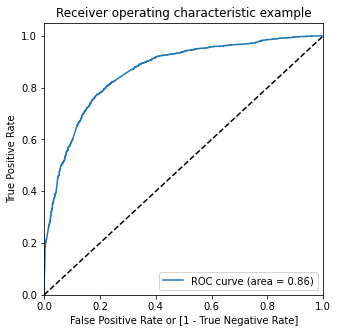

In [96]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The Area under the ROC Curve is 0.86 which in our opinion is quite good. Hence, we seem to have a good working Model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [97]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.191032,0,1,1,0,0,0,0,0,0,0,0
1,0,0.187786,0,1,1,0,0,0,0,0,0,0,0
2,0,0.091584,0,1,0,0,0,0,0,0,0,0,0
3,1,0.903318,1,1,1,1,1,1,1,1,1,1,1
4,1,0.573478,1,1,1,1,1,1,1,0,0,0,0


In [98]:

# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.489930  1.000000  0.000000
0.1   0.1  0.561666  0.991686  0.148625
0.2   0.2  0.712378  0.943187  0.490683
0.3   0.3  0.759674  0.912240  0.613132
0.4   0.4  0.789998  0.813395  0.767524
0.5   0.5  0.791129  0.751963  0.828749
0.6   0.6  0.776646  0.683141  0.866460
0.7   0.7  0.741344  0.559815  0.915705
0.8   0.8  0.709437  0.460970  0.948092
0.9   0.9  0.640190  0.288222  0.978261


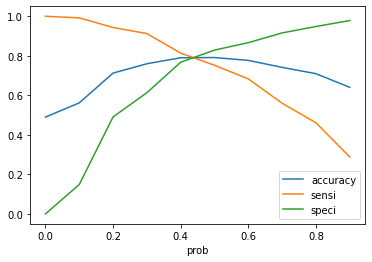

In [99]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.191032,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.187786,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.091584,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.903318,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.573478,1,1,1,1,1,1,1,0,0,0,0,1


In [101]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7893188504186468

In [102]:
# Creating Confusion Matrix yet Again

confused2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

print(confused2)

[[1759  495]
 [ 436 1729]]


In [103]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        1759      495
# Converted            436       1729  

In [104]:
# Let's evaluate the other metrics Again as well

TP = confused2[1,1] # true positive 
TN = confused2[0,0] # true negatives
FP = confused2[0,1] # false positives
FN = confused2[1,0] # false negatives 

In [105]:
# Calculate Sensitivity

TP/(TP+FN)

0.7986143187066974

In [106]:
# Calculate Specificity

TN/(TN+FP)

0.7803904170363798

#### This cutoff point of 0.42 is good for our Model

## Step 8: Making Predictions on the Test Set

In [107]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [108]:
# Select the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
7999,0.052632,0.094097,0.090909,0,0,0,0,1,0,0,0,0
3905,0.052632,0.015979,0.090909,0,0,0,0,1,0,0,0,0
6301,0.157895,0.412783,0.272727,0,0,0,0,0,0,0,1,0
1031,0.210526,0.064359,0.363636,0,0,0,0,1,0,0,0,0
6255,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0


In [109]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [110]:
# Checking X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
7999,1.0,0.052632,0.094097,0.090909,0,0,0,0,1,0,0,0,0
3905,1.0,0.052632,0.015979,0.090909,0,0,0,0,1,0,0,0,0
6301,1.0,0.157895,0.412783,0.272727,0,0,0,0,0,0,0,1,0
1031,1.0,0.210526,0.064359,0.363636,0,0,0,0,1,0,0,0,0
6255,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,1,0
5163,1.0,0.263158,0.179760,0.454545,0,0,0,0,0,0,0,0,0
2743,1.0,0.157895,0.069241,0.272727,0,0,0,0,0,0,0,0,0
4137,1.0,0.315789,0.465601,0.272727,0,0,0,0,0,0,0,0,0


In [111]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [112]:
y_test_pred[:10]

7999    0.066097
3905    0.047943
6301    0.694944
1031    0.058205
6255    0.644389
6507    0.326135
6603    0.326093
7821    0.752956
6882    0.644389
1877    0.606742
dtype: float64

In [113]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [114]:
# Let's see the head

y_pred_1.head()

,0
7999,0.066097
3905,0.047943
6301,0.694944
1031,0.058205
6255,0.644389


In [115]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [116]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [118]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.066097
1,0,0.047943
2,1,0.694944
3,0,0.058205
4,1,0.644389


In [119]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [120]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.066097
1,0,0.047943
2,1,0.694944
3,0,0.058205
4,1,0.644389


In [121]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [122]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.066097,0
1,0,0.047943,0
2,1,0.694944,1
3,0,0.058205,0
4,1,0.644389,1


In [123]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7872228088701162

In [124]:
confused3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confused3

array([[807, 212],
       [191, 684]], dtype=int64)

In [125]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        807       212
# Converted            191       684

In [126]:
TP = confused3[1,1] # true positive 
TN = confused3[0,0] # true negatives
FP = confused3[0,1] # false positives
FN = confused3[1,0] # false negatives

In [127]:
# Calculate sensitivity
TP / float(TP+FN)

0.7817142857142857

In [128]:
# Calculate specificity
TN / float(TN+FP)

0.7919528949950932

### Building the Training Model Using the Precision-Recall View

In [129]:
# Looking at the Confusion matrix again
confused4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confused4

array([[1868,  386],
       [ 537, 1628]], dtype=int64)

##### Precision
TP / TP + FP

In [130]:
confused4[1,1]/(confused4[0,1]+confused4[1,1])

0.8083416087388282

##### Recall
TP / TP + FN

In [131]:
confused4[1,1]/(confused4[1,0]+confused4[1,1])

0.7519630484988452

#### Looking at Precision and Recall Tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 4414    1
 4415    0
 4416    0
 4417    1
 4418    0
 Name: Converted, Length: 4419, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 4414    1
 4415    0
 4416    0
 4417    1
 4418    0
 Name: Predicted, Length: 4419, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

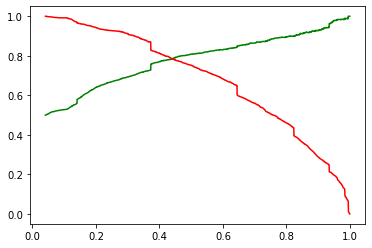

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.191032,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.187786,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.091584,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.903318,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.573478,1,1,1,1,1,1,1,0,0,0,0,1


In [137]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895451459606245

In [138]:
# Let's create the confusion matrix once again

confused5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confused5

array([[1789,  465],
       [ 465, 1700]], dtype=int64)

In [139]:
# Let's evaluate the other metrics as well

TP = confused5[1,1] # true positive 
TN = confused5[0,0] # true negatives
FP = confused5[0,1] # false positives
FN = confused5[1,0] # false negatives

In [140]:
# Calculate Precision

TP/(TP+FP)

0.7852193995381063

In [141]:
# Calculate Recall

TP/(TP+FN)

0.7852193995381063

So this cutoff of 0.44 seems good for our model

### Making Predictions on the Test Set

In [142]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [143]:
y_test_pred[:10]

7999    0.066097
3905    0.047943
6301    0.694944
1031    0.058205
6255    0.644389
6507    0.326135
6603    0.326093
7821    0.752956
6882    0.644389
1877    0.606742
dtype: float64

In [144]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head

y_pred_1.head()

,0
7999,0.066097
3905,0.047943
6301,0.694944
1031,0.058205
6255,0.644389


In [146]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [147]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.066097
1,0,0.047943
2,1,0.694944
3,0,0.058205
4,1,0.644389


In [150]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [151]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.066097
1,0,0.047943
2,1,0.694944
3,0,0.058205
4,1,0.644389


In [152]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [153]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.066097,0
1,0,0.047943,0
2,1,0.694944,1
3,0,0.058205,0
4,1,0.644389,1


In [154]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866948257655755

In [155]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[821, 198],
       [206, 669]], dtype=int64)

In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Calculate Precision

TP/(TP+FP)

0.7716262975778547

In [158]:
# Calculate Recall

TP/(TP+FN)

0.7645714285714286